# DAT300 - Compulsory assignment 1

## Group 
CA1-34 
  
## Members
- Muhammad Ashar
- Raul Andreas Sajines Morato
- Aditya Dey

# Introduction

<i>Description of the compulsory assignment task as understood by the group (what kind of problem are you going to solve?, etc), and description of roles in the group during the compulsory assignment (80-120 words).</i>

The dataset provided is a classification problem related to Forest Type based on features that include information about soil values, amount of light the forest intakes across the day, distance from water source for higher or lower vegetation and ground elevation and slope. 

We competed with each other to write the best code version and then discussed why that code worked better than other. Then we would circulate the best version among each other and again compete to fine tune the parameters and reach maxmimum accuracy results. Therefore the contribution to each code written below is equal. 




In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# F`or example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dat300-h2022-ca1/sample_submission.csv
/kaggle/input/dat300-h2022-ca1/train.csv
/kaggle/input/dat300-h2022-ca1/test.csv


## 1. Data pre-processing and visualisation

In [22]:
import matplotlib.pyplot as plt

In [23]:
df_train_raw = pd.read_csv("/kaggle/input/dat300-h2022-ca1/train.csv", sep=";")
df_test_raw = pd.read_csv("/kaggle/input/dat300-h2022-ca1/test.csv", sep=';')

In [24]:
df_train_raw.drop(["Unnamed: 0"], axis=1, inplace=True)
df_test_raw.drop(["Unnamed: 0"], axis=1, inplace=True)

In [25]:
df_train_raw["Forest type"].unique()

array(['Cottonwood', 'Lodgepole'], dtype=object)

In [26]:
df_train_raw.isna().sum()

National Park                                          0
Elevation (meters)                                     0
Aspect (azimuth)                                       0
Slope (degrees)                                        0
Horizontal distance to water (meters)                  0
Vertical distance to water (meters)                    0
Horizontal distance to road (meters)                   0
Light at 9AM (hillshade)                               0
Light at noon (hillshade)                              0
Light at 3PM (hillshade)                               0
Horizontal distance to fire ignition point (meters)    0
Soil 1                                                 0
Soil 2                                                 0
Soil 3                                                 0
Soil 4                                                 0
Soil 5                                                 0
Soil 6                                                 0
Soil 7                         

No missing values.

In [27]:
# One Hot encoding for categorical features

df_train_enc = pd.get_dummies(df_train_raw[['National Park','Forest type']],drop_first=True)
df_test_enc = pd.get_dummies(df_test_raw[['National Park']],drop_first=True)

df_train_f = df_train_enc.join(df_train_raw)
df_test_f = df_test_enc.join(df_test_raw)
df_train_f = df_train_f.drop(columns=['National Park','Forest type'])
df_test_f = df_test_f.drop(columns=['National Park'])

print(f'Train Data Shape:{df_train_f.shape},\n Test Data Shape: {df_test_f.shape}')

Train Data Shape:(1398095, 54),
 Test Data Shape: (599184, 53)


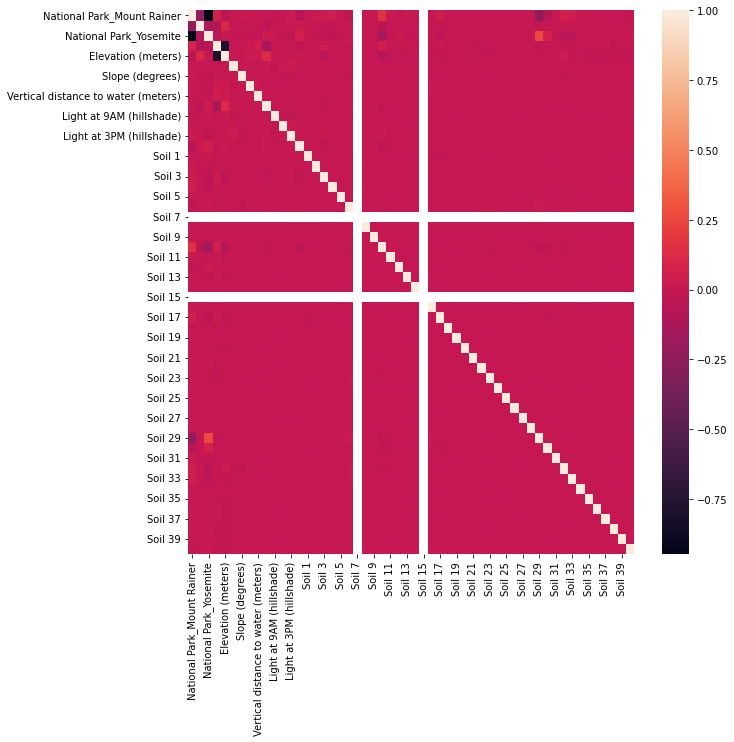

In [28]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df_train_f.corr())
plt.show()

No major correlation among features, therefore none of them should be dropped yet.

In [29]:
df_train_final = df_train_f[['National Park_Mount Rainer', 'National Park_Yellowstone',
       'National Park_Yosemite', 'Elevation (meters)',
       'Aspect (azimuth)', 'Slope (degrees)',
       'Horizontal distance to water (meters)',
       'Vertical distance to water (meters)',
       'Horizontal distance to road (meters)', 'Light at 9AM (hillshade)',
       'Light at noon (hillshade)', 'Light at 3PM (hillshade)',
       'Horizontal distance to fire ignition point (meters)', 'Soil 1',
       'Soil 2', 'Soil 3', 'Soil 4', 'Soil 5', 'Soil 6', 'Soil 7', 'Soil 8',
       'Soil 9', 'Soil 10', 'Soil 11', 'Soil 12', 'Soil 13', 'Soil 14',
       'Soil 15', 'Soil 16', 'Soil 17', 'Soil 18', 'Soil 19', 'Soil 20',
       'Soil 21', 'Soil 22', 'Soil 23', 'Soil 24', 'Soil 25', 'Soil 26',
       'Soil 27', 'Soil 28', 'Soil 29', 'Soil 30', 'Soil 31', 'Soil 32',
       'Soil 33', 'Soil 34', 'Soil 35', 'Soil 36', 'Soil 37', 'Soil 38',
       'Soil 39', 'Soil 40', 'Forest type_Lodgepole']]

df_train_final.shape

(1398095, 54)

In [30]:
X_train = df_train_final.iloc[:,0:53].values
X_test = df_test_f.values

# Validate column shape is same in train and test
print(X_train.shape, X_test.shape)

(1398095, 53) (599184, 53)


In [31]:
y_train = df_train_final.iloc[:,53].values

In [32]:
# Train Test Split Data to 70:30

from sklearn.model_selection import train_test_split

X_trainer,X_tester, y_trainer, y_tester = train_test_split(X_train, y_train, test_size=0.3, random_state=1) 

In [33]:
# Standardization

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
sc.fit(X_trainer)

# Training and Validation Test data
X_trainer_std = sc.transform(X_trainer)
X_tester_std = sc.transform(X_tester)

# Final test data 
X_test_std = sc.transform(X_test)

<i>Note:</i> PCA had been tried but the eigenvalues were like 0.04, 0.02, etc. which is way too low for 5 to 10 components, therefore we chose only to standardize but not implement PCA since the accuracy in ANN was 62%.

# Modelling

## 1. Scikit-learn

Report on methods involved, strategies, number of parameters, failed efforts (160-240 words)

### Classification model based on algorithms from scikit-learn (e.g. logistic regression, possibly regularized, Support Vector Classifier, etc.).


In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1.0, penalty="l2", max_iter=100)

lr.fit(X_trainer_std, y_trainer)

print('Training data accuracy Logistic Regression: {0:.2f}'.format(lr.score(X_trainer, y_trainer)))
print('Validation Test data accuracy Logistic Regression: {0:.2f}'.format(lr.score(X_tester, y_tester)))

Training data accuracy Logistic Regression: 0.38
Validation Test data accuracy Logistic Regression: 0.38


### Ensemble model (e.g. random forest or similar)

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',
                                n_estimators=100, 
                                random_state=1,
                                n_jobs=-1) 
rf.fit(X_train, y_train)

print('Training data accuracy Random Forest: {0:.2f}'.format(rf.score(X_trainer, y_trainer)))
print('Validation Test data accuracy Random Forest: {0:.2f}'.format(rf.score(X_tester, y_tester)))

Training data accuracy Random Forest: 1.00
Validation Test data accuracy Random Forest: 1.00


## 2. Neural Network with Keras


Report on methods involved, strategies, number of parameters, failed efforts (160-240 words)


In [36]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [37]:
model_1 = models.Sequential([
    layers.Dense(units=32, activation='relu'), #Hidden Layer 1 with 16 nodes
    layers.Dense(units=32, activation='relu'), # Hidder layer 2 with 16 nodes
    layers.Dense(units=1, activation='sigmoid')]) # Output layer with 1 node

model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

2022-10-06 18:20:56.298863: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 18:20:56.399346: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 18:20:56.400161: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-06 18:20:56.402134: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [38]:
history = model_1.fit(X_trainer_std, y_trainer, epochs=300, batch_size=5000, validation_data=(X_tester_std, y_tester))

2022-10-06 18:20:59.443351: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
196/196 [==============================] - 3s 6ms/step - loss: 0.3302 - accuracy: 0.8614 - val_loss: 0.1504 - val_accuracy: 0.9432
Epoch 2/300
196/196 [==============================] - 1s 5ms/step - loss: 0.1271 - accuracy: 0.9511 - val_loss: 0.1128 - val_accuracy: 0.9558
Epoch 3/300
196/196 [==============================] - 1s 5ms/step - loss: 0.1058 - accuracy: 0.9584 - val_loss: 0.0996 - val_accuracy: 0.9606
Epoch 4/300
196/196 [==============================] - 1s 4ms/step - loss: 0.0956 - accuracy: 0.9622 - val_loss: 0.0914 - val_accuracy: 0.9635
Epoch 5/300
196/196 [==============================] - 1s 5ms/step - loss: 0.0888 - accuracy: 0.9649 - val_loss: 0.0866 - val_accuracy: 0.9653
Epoch 6/300
196/196 [==============================] - 1s 4ms/step - loss: 0.0841 - accuracy: 0.9665 - val_loss: 0.0830 - val_accuracy: 0.9666
Epoch 7/300
196/196 [==============================] - 1s 5ms/step - loss: 0.0806 - accuracy: 0.9677 - val_loss: 0.0797 - val_accuracy: 0.9675

### ANN Results

Report on your best ANN found and print out relevant metrics

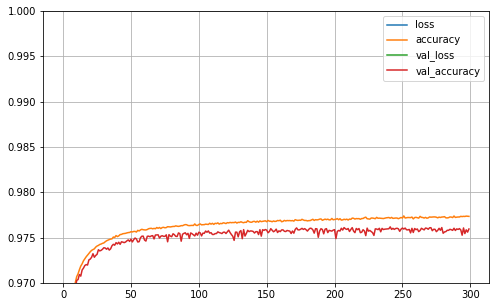

In [39]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.97,1)
plt.show()

Best Public Score: 0.97651

The above graph for training accuracy and validation accuracy shows that there is an inclination representing the model keeps learning a little by little during these 300 epochs. Between each epoch the difference is +-0.01 but still keeps improving showing that the weights in the network can keep adjusting to improvise little which may also end up overfitting and private score may become lower.

## Predict and Submit

In [40]:
y_pred = model_1.predict(X_test_std)

In [41]:
index = [i for i in range(y_pred.shape[0])]
y_pred_string  = []
for i in range(y_pred.shape[0]):
    if y_pred[i][0] <= 0.5:
        y_pred_string.append('Cottonwood')
    else:
        y_pred_string.append('Lodgepole')
        
pred_csv = {'Index': index, 'Predicted': y_pred_string}
df_csv = pd.DataFrame(pred_csv).set_index('Index')
df_csv.to_csv('submission.csv')

# Discussion / conclusion

Provide a summary of the assignment: (you are required to address **the first three** points of the list below)
- obstacles / problems you have met regarding the modelling proces
- degree of success of the three models
- given more time, what would be done differently
- further comments (if any)


Logistic and RandomForest had bad accuracy since there was no correalation that it could even work on. Even with PCA it had no major improvements. Single network performance for larger dataset is very poor.

In ANN model we learnt that 8 + 8 hidden layers with lower batch size of 16-64,  16+16 with 128 batch size and 32 + 32 with 1000-5000 batch size results in same accuracy the difference is in learning speed. 8+8 learns over 25 epochs which 16+16 can learn in 10-20 epochs and 32+32 can learn in 5-10 epochs. If we reverse the batch size such that 32+32 has 16-64 batch size, it will also reach similar accuracy but will take longer duration to process. Therfore the optimum choice was made with more networks and higher batch size for increased learning rate so that the weights adjust faster via backpropagation and providing more epochs would be helpful.

We could have stopped with 10-25 epochs instead of 300 but its just 300 reached a very high score of 0.97651 whereas 10-25 epochs would reach 0.970-0.971. In real world sceario we do not suspect 0.001 to be a major improvement but for this activity it just provides high score with probability of overfitting. 

Since the validation accuracy graph was showing slight improvements if we had ran for 1000 epochs it could had reached 0.98 validation accuracy too.


